**Introduction to Python, Numpy and Scipy**

Imports

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
from numpy.linalg import matrix_rank
from numpy import linalg as LA

import matplotlib.pyplot as plt

import seaborn as sns

from os import path
import urllib
import zipfile
import sys

import string

import time
from copy import copy


1) From a word containing all the alphabet letters, generate with a string slicing the string cfilorux.
Do the same for the string vxz.

In [9]:
string_1 = string.ascii_lowercase[:26]
string_2 = string.ascii_lowercase[2:26:3]
string_3 = string.ascii_lowercase[21:26:2]
print (f'This is one option to get from {string_1} to {string_2} and {string_3}')

This is one option to get from abcdefghijklmnopqrstuvwxyz to cfilorux and vxz


2) Display the number π with 9 digits.

In [10]:
pi = np.pi
rounded = round(pi,9)
print (f'The number π with 9 digits is {rounded}')

The number π with 9 digits is 3.141592654


3) Count the number of occurrences of each character in the string s="HelLo WorLd!!". Output a
dictionary that for each character associate the number of occurrences.

In [11]:
string = "HelLo WorLd!!"
dic = {i : string.count(i) for i in set(string)}
print (f'The count of all characters in {string} is :\n' + str(dic)) 

The count of all characters in HelLo WorLd!! is :
{'o': 2, 'W': 1, 'L': 2, 'd': 1, 'r': 1, '!': 2, ' ': 1, 'e': 1, 'H': 1, 'l': 1}


In [12]:
string = "HelLo WorLd!!"
occurences = {}
for letter in string:
    if letter in occurences:
        occurences[letter] += 1
    else:
        occurences[letter] = 1
print('Here is an alternative method:\n' + str(occurences))

Here is an alternative method:
{'H': 1, 'e': 1, 'l': 1, 'L': 2, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 2}


4) Write a function performing the Cesar code : each character is replaced by the third next one (i.e.
a by d, b by e, z by c). Test it.

In [13]:
def encrypt(text,s): 
    result = "" 
    for i in range(len(text)): 
        char = text[i] 
        # Encrypt uppercase characters 
        if (char.isupper()): 
            result += chr((ord(char) + s-65) % 26 + 65) 
        # Encrypt lowercase characters 
        else: 
            result += chr((ord(char) + s - 97) % 26 + 97) 
    return result 
  
#check the above function 
text = "Louis!"
s = 3
print(f'The text "{text}" with a shift of {s} returns {encrypt(text,s)}')

The text "Louis!" with a shift of 3 returns Orxlvr


In [14]:
KEY = 3

def ceasar_cipher(string):
    ciphered = ''
    for letter in string:
        ciphered += cipher(letter)
    return ciphered

def cipher(letter):
    code = ord(letter) + KEY
    if code <= 122:
        return chr(code)
    else:
        return chr(96 + code % 122)

print("ceasar_cipher('abcd') == 'defg': {}".format(ceasar_cipher('abcd') == 'defg'))
print("ceasar_cipher('mathis') == 'pdwklv': {}".format(ceasar_cipher('mathis') == 'pdwklv'))
print("ceasar_cipher('louis') == 'orxlv': {}".format(ceasar_cipher('louis') == 'orxlv'))

ceasar_cipher('abcd') == 'defg': True
ceasar_cipher('mathis') == 'pdwklv': True
ceasar_cipher('louis') == 'orxlv': True


5) Compute this product. Use for instance time to determine a fast version. Propose a version without loop, using Numpy

In [15]:
start = time.time()
x = np.arange(1,100000)
f = 2*(4*x**2)/(4*x**2-1)
res = np.prod(f)
end = time.time()
time = round(end-start,5)
print(f"The product result is {res}. It took {time} sec to compute")

The product result is inf. It took 0.0029 sec to compute


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


6) Without using for / while loops, create a random matrix with coefficients taken uniformly (and independently) in  Substract to each even column of M, twice the value of the following (uneven) column Replace the negative values by 0 using a binary mask.

In [16]:
# Creating a random matrix in Mp,r(5,6) with coefficients taken uniformly
# (and independently) in [-1, 1]
M = np.random.uniform(low=-1, high=1, size=(5,6))

# Substract to each even column of M, twice the value of
# the following (uneven) column 
N = copy(M) # avoiding reference
N[:, 1::2]=[[00000]]
N = np.roll(N, -1, axis=1)
N = 2*N
M = M-N

# Replace the negative values by 0 using a binary mask
M = np.where(M < 0, 0, M)

print (f'The final matrix is :\n' + str(M))

The final matrix is :
[[0.         0.         0.05570437 0.68993646 0.         2.43918064]
 [0.97413788 0.         0.58213874 0.         0.9764844  0.        ]
 [0.         0.14161415 0.25272095 0.         0.27784277 0.        ]
 [0.         1.64165604 0.         0.         0.64009786 2.1089656 ]
 [0.         0.         0.6522237  0.65404786 0.         0.06643984]]


7) Create a random matrix M P 5 ˆ 20 with coefficients taken uniformly (and independently) in
r´1, 1s. Test whether G “ MJM is symmetric (semi-) definite positive, and that its eigenvalues are
positive. What is the rank of G ? Compute the Euclidean norm of G. Compute the `1 norm of the
columns of G.

In [17]:
M = np.random.uniform(low=-1, high=1, size=(5,20))
MT = M.T
G = np.dot(MT, M)

def is_sym_pos_sem_def(x):
    if np.allclose(G, G.T) == True:
        if np.all(np.linalg.eigvals(x) > 0):
                  return "The matrix is symmetric positive definite"
        elif np.all(np.linalg.eigvals(x) >= 0):
                  return "The matrix symmetric positive semi-definite"
        else:
            return "The matrix is symmetric but not positive semi-definite nor definite"
    else:
        return "The matrix is not symmetric"
    
print(is_sym_pos_sem_def(G))

rank = matrix_rank(G) 
print (f'The rank of G is {rank}')

norm = LA.norm(G)
print (f'The Euclidian norm of G is {norm}')

for i in range(0, np.shape(G)[1]):
    c = G[:,i] 
    l1 = LA.norm(c, ord=1)  
    print(f'The L1 norm of column {i+1} is {round(l1, 2)}')

The matrix is symmetric but not positive semi-definite nor definite
The rank of G is 5
The Euclidian norm of G is 17.03574174677141
The L1 norm of column 1 is 11.42
The L1 norm of column 2 is 14.84
The L1 norm of column 3 is 8.52
The L1 norm of column 4 is 8.41
The L1 norm of column 5 is 17.56
The L1 norm of column 6 is 16.92
The L1 norm of column 7 is 10.09
The L1 norm of column 8 is 15.55
The L1 norm of column 9 is 14.7
The L1 norm of column 10 is 17.81
The L1 norm of column 11 is 15.19
The L1 norm of column 12 is 14.23
The L1 norm of column 13 is 12.54
The L1 norm of column 14 is 12.51
The L1 norm of column 15 is 16.89
The L1 norm of column 16 is 8.6
The L1 norm of column 17 is 14.74
The L1 norm of column 18 is 8.95
The L1 norm of column 19 is 13.5
The L1 norm of column 20 is 9.2


8) Use a list comprehension to construct a list with all squares from 1 to 121. Do the same using only
numpy

In [18]:
squares = [i**2 for i in range(1, 12)] # compute it as math.sqrt(121)+1?
squares_np = np.square(range(1,12))
squares == squares_np

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

**Introduction to Pandas, Matplotlib, etc**

9) First, execute the following commands to download the data (this snippet is also in
download_hpc.py on the Moodle if copy pasting fails) :

In [19]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)

10) Detect and count the number of line with missing values

In [20]:
df.isna()

,Date,Time,Global_active_power
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
199995,False,False,False
199996,False,False,False
199997,False,False,False
199998,False,False,False


In [21]:
df[df.isna().any(axis=1)] 

,Date,Time,Global_active_power
6839,21/12/2006,11:23:00,NaN
6840,21/12/2006,11:24:00,NaN
19724,30/12/2006,10:08:00,NaN
19725,30/12/2006,10:09:00,NaN
41832,14/1/2007,18:36:00,NaN
...,...,...,...
194215,30/4/2007,14:19:00,NaN
194216,30/4/2007,14:20:00,NaN
194217,30/4/2007,14:21:00,NaN
194218,30/4/2007,14:22:00,NaN


In [22]:
df.isna().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

We have to be aware of the limitations of .isna which only surfaces NaN or None values. 
In a real setting we would devise strategies to identify other types of missing values.

11) Erase all such lines.

In [23]:
df = df.dropna() # drop rows with at least one NaN value

In [24]:
df.shape

(196268, 3)

In [25]:
df.isna().sum()

Date                   0
Time                   0
Global_active_power    0
dtype: int64

12) Use to_datetime and set_index to create a Time Series (beware of the international dates format that is different from the French standard).

In [26]:
# Concatenate Date and Time columns into a new Datetime column
df['Datetime'] = df['Date'] + ' ' + df['Time']

# Convert Datetime to datetime format
df['Datetime'] =  pd.to_datetime(df['Datetime'], dayfirst=True)
# print(df.dtypes) Datetime is of datetime64[ns] type

# Set the converted column to index
df = df.set_index('Datetime')
df = df.drop(df.columns[[0, 1]], axis=1)
print(df.head())
print(df.shape)

                     Global_active_power
Datetime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666
(196268, 1)


                     Global_active_power
Datetime                                
2007-01-01 00:00:00                2.580
2007-01-01 00:01:00                2.552
2007-01-01 00:02:00                2.550
2007-01-01 00:03:00                2.550
2007-01-01 00:04:00                2.554
...                                  ...
2007-04-30 23:55:00                0.362
2007-04-30 23:56:00                0.362
2007-04-30 23:57:00                0.362
2007-04-30 23:58:00                0.358
2007-04-30 23:59:00                0.356

[169072 rows x 1 columns]
(169072, 1)
            Global_active_power
Datetime                       
2007-01-01             1.909031
2007-01-02             0.881414
2007-01-03             0.704204
2007-01-04             2.263481
2007-01-05             1.884281
...                         ...
2007-04-26             0.885740
2007-04-27             0.759953
2007-04-28             1.082762
2007-04-29                  NaN
2007-04-30             0.730594

[120 rows x

Text(0, 0.5, 'Household global active power (in kilowatt)')

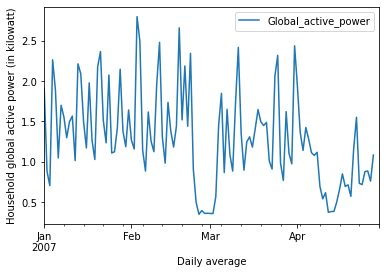

In [27]:
# Create a new dataframe between January 1 2007 and April 30 2007
df2 = df.loc['2007-01-01':'2007-04-30']  
print(df2)
print(df2.shape) # we only lose 15 days

# Get daily averages
df3 = df2.resample('D').mean()
print(df3) # We get NaNs! How come!
print(df3.shape) # We get 120 rows, i.e. 4x30 days

# Display it using matplotlib 
df3.plot()
plt.xlabel("Daily average")
plt.ylabel("Household global active power (in kilowatt)")

# Display it using Seaborn


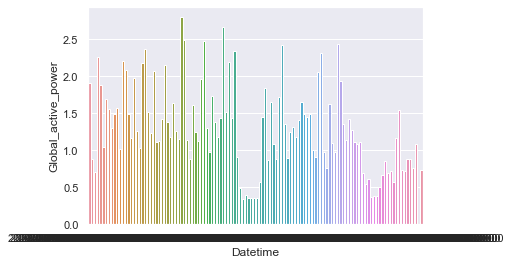

In [28]:
sns.set()
sns.barplot(x=df3.index, y="Global_active_power", data=df3)
# x-axis not showing up

Observations: <br>
Usual pattern: fluctuating around average 1.5, mostly between 1 and 2. 0.2 and 0.4 seems to be the floor consumption (batteries charging etc). Peak when people wake up and in the evening. Saturday nights: more activity at night <br>
We get 4 peaks per months, probably on weekends (further analysis required: time series decomposition) (cyclycity) <br>
We have 2 outliers below average: end of feb, end of april <br>
Feb 23th - March 3rd: average is much lower (between 0.2 and 04). There are regular peaks throughout the 
day (every 10 hour). Supply outage? A min was reached Feb 25th <br>

14) Load the dataset with pandas, and keep only the DATE and TG columns. Divide by 10 the TG column to get Celsius temperature. Treat missing values as NaNs

In [29]:
orly = pd.read_csv('TG_STAID011249.txt', sep=",")
orly 

# df = pd.read_csv('some_data.csv', usecols = ['DATE','TG']) throws an error

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0
...,...,...,...,...,...
34878,11249,907149,20160827,266,0
34879,11249,907149,20160828,255,0
34880,11249,907149,20160829,206,0
34881,11249,907149,20160830,204,0


In [30]:
orly.columns # We got an error because the colnames have whitespace

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [31]:
old_cols = list(orly.columns)
new_cols = [i.strip() for i in old_cols] 
new_cols

['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG']

In [32]:
orly.columns = new_cols
orly.columns

Index(['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [33]:
orly = orly[['DATE','TG']]
orly

,DATE,TG
0,19210301,50
1,19210302,46
2,19210303,46
3,19210304,31
4,19210305,95
...,...,...
34878,20160827,266
34879,20160828,255
34880,20160829,206
34881,20160830,204


In [34]:
orly['TG'] = orly['TG'].div(10)
orly

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5
...,...,...
34878,20160827,26.6
34879,20160828,25.5
34880,20160829,20.6
34881,20160830,20.4


In [35]:
orly.isna().sum()

DATE    0
TG      0
dtype: int64

In [36]:
orly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    34883 non-null  int64  
 1   TG      34883 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 545.2 KB


In [37]:
orly.describe()

,DATE,TG
count,3.488300e+04,34883.000000
mean,1.968482e+07,-231.823358
std,2.757153e+05,432.177821
min,1.921030e+07,-999.900000
25%,1.945011e+07,-2.800000
50%,1.968113e+07,8.200000
75%,1.992102e+07,15.000000
max,2.016083e+07,31.600000


In [38]:
orly.TG.mode()

0   -999.9
dtype: float64

In [39]:
orly.loc[orly['TG'] < -999] = np.nan

In [40]:
orly.isna().sum()

DATE    8387
TG      8387
dtype: int64

15) Create a pandas Time Series with the daily temperatures between January 1 2007 and April 3 2007. Display on the same graph the temperature and the Global_active_power Time Series.

In [41]:
orly['DATE'] = pd.to_datetime(orly['DATE'], format='%Y%m%d')
orly = orly.set_index('DATE')
orly

,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
...,...
2016-08-27,26.6
2016-08-28,25.5
2016-08-29,20.6


Text(0, 0.5, 'Temperature (°C)')

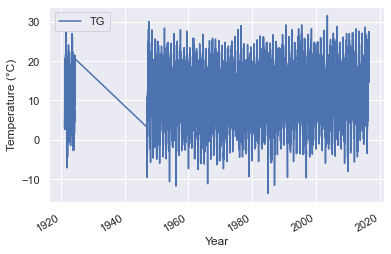

In [42]:
orly.plot()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

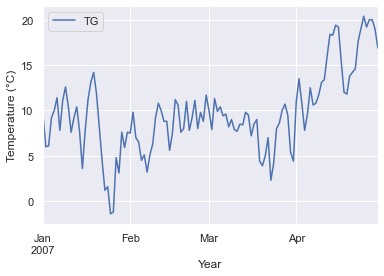

In [43]:
orly_2 = orly.loc['2007-01-01':'2007-04-30'] 
orly_2.plot()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

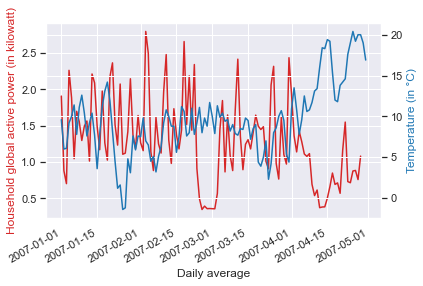

In [45]:
# Create some mock data
t = orly_2.index
data1 = df3['Global_active_power']
data2 = orly_2['TG']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Daily average')
ax1.set_ylabel('Household global active power (in kilowatt)', color=color)
ax1.plot(t, data1, color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature (in °C)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)

fig.autofmt_xdate()

plt.show()